# Level-2: Task-4

## Task: Restaurant Chains

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath="D:\\manu\\data_science\\cognifyz\\Datasets.csv"
df=pd.read_csv(filepath)

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape

(9551, 21)

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df['Chain'] = df['Restaurant Name'].apply(lambda x: ' '.join(x.split()[:2]) if ' ' in x else x)

# Analyze the ratings and popularity of different restaurant chains
chain_stats = df.groupby('Chain').agg({'Aggregate rating': 'mean', 'Votes': 'sum'}).sort_values(by='Aggregate rating', ascending=False)
chain_stats
print("Top Chains by Average Rating:")
print(chain_stats['Aggregate rating'].head(10))

print("\nTop Chains by Popularity (Total Votes):")
print(chain_stats['Votes'].head(10))

Top Chains by Average Rating:
Chain
Atlanta Highway     4.9
Cube -              4.9
Urbanologi          4.9
Caterspoint         4.9
Grandson of         4.9
Mr. Dunderbak's     4.9
Sushi Masa          4.9
Tresind -           4.9
Sagar Gaire         4.9
Talaga Sampireun    4.9
Name: Aggregate rating, dtype: float64

Top Chains by Popularity (Total Votes):
Chain
Atlanta Highway      681
Cube -               441
Urbanologi           194
Caterspoint          223
Grandson of         1057
Mr. Dunderbak's     1413
Sushi Masa           605
Tresind -           1352
Sagar Gaire          427
Talaga Sampireun    5514
Name: Votes, dtype: int64


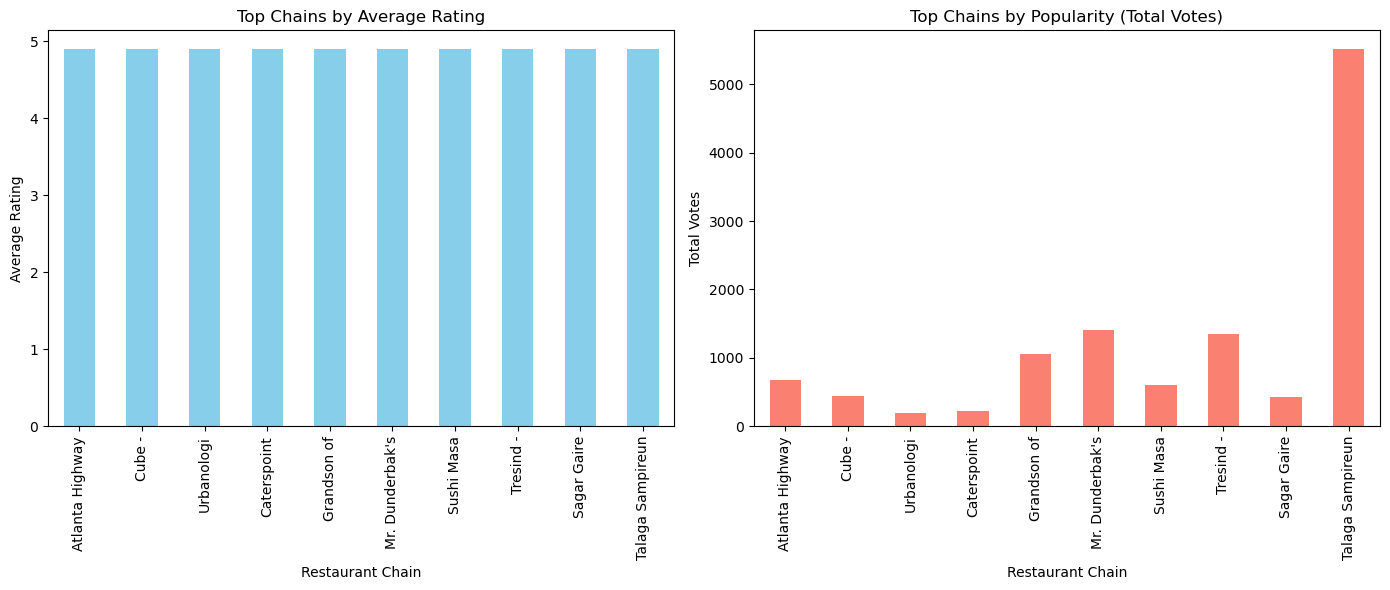

In [7]:
# Visualize the ratings and popularity of top chains
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
chain_stats['Aggregate rating'].head(10).plot(kind='bar', color='skyblue')
plt.title('Top Chains by Average Rating')
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
chain_stats['Votes'].head(10).plot(kind='bar', color='salmon')
plt.title('Top Chains by Popularity (Total Votes)')
plt.xlabel('Restaurant Chain')
plt.ylabel('Total Votes')

plt.tight_layout()
plt.show()